In [ ]:
DATASET DESCRPTION:

#The Crime Dataset is about Crimes which have taken place in India over the years. 
#This dataset has 600 Rows and 14 Columns, which offers valuable insights for crime-pattern based analysis,policy-making and crime prevention strategies
#The various attributes or features of the dataset are:

#Date Reported: The date on which the crime was officially reported to authorities, aiding in understanding reporting delays and their patterns.

#Date of Occurrence: The actual date when the crime took place, useful for analyzing crime trends over time.

#Time of Occurrence: The specific time when the crime occurred, helping to identify high-risk time periods for various types of crimes.

#City: The city where the crime was reported, enabling geographic crime mapping and regional comparisons.

#Crime Code: A unique identifier or code assigned to each type of crime, facilitating categorical analysis and trend identification.

#Crime Description: A detailed narrative or classification of the crime committed, offering qualitative context for the incident.

#Victim Age: The age of the victim involved, useful for demographic analysis and vulnerability assessments.

#Victim Gender: The gender of the victim, providing insights into gender-specific crime patterns and prevention strategies.

#Weapon Used: Information on the weapon or tools used in the crime, aiding in understanding crime severity and planning countermeasures.

#Crime Domain: The broader category or domain of the crime (e.g., Violent,Traffic Fatality), helping to classify and study crimes within specific areas.

#Police Deployed: The number or type of police personnel involved in responding to or investigating the crime, useful for resource allocation analysis.

#Case Closed: A binary attribute indicating whether the case has been resolved (closed) or is still open, useful for evaluating the efficiency of the judicial and law enforcement processes.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/Sumit Emmanuel/OneDrive/Desktop/BCA/crimes.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       600 non-null    int64 
 1   Date Reported       600 non-null    object
 2   Date of Occurrence  600 non-null    object
 3   Time of Occurrence  600 non-null    object
 4   City                600 non-null    object
 5   Crime Code          600 non-null    int64 
 6   Crime Description   600 non-null    object
 7   Victim Age          600 non-null    int64 
 8   Victim Gender       600 non-null    object
 9   Weapon Used         511 non-null    object
 10  Crime Domain        600 non-null    object
 11  Police Deployed     600 non-null    int64 
 12  Case Closed         600 non-null    object
 13  Date Case Closed    291 non-null    object
dtypes: int64(4), object(10)
memory usage: 65.8+ KB


In [6]:
df.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02/01/2020 00:00,01/01/2020 00:00,01/01/2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01/01/2020 19:00,01/01/2020 01:00,01/01/2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02/01/2020 05:00,01/01/2020 02:00,01/01/2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01/01/2020 05:00,01/01/2020 03:00,01/01/2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29/04/2020 05:00
4,5,01/01/2020 21:00,01/01/2020 04:00,01/01/2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08/01/2020 21:00


In [7]:
df.tail()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
595,596,28/01/2020 16:00,01-25-2020 19:00,26/01/2020 15:56,Bangalore,509,SHOPLIFTING,11,F,Poison,Other Crime,9,Yes,11/03/2020 16:00
596,597,28/01/2020 08:00,01-25-2020 20:00,26/01/2020 03:36,Pune,202,PUBLIC INTOXICATION,12,F,Explosives,Other Crime,14,Yes,26/02/2020 08:00
597,598,26/01/2020 12:00,01-25-2020 21:00,26/01/2020 11:18,Chennai,337,TRAFFIC VIOLATION,35,F,Other,Traffic Fatality,16,Yes,14/02/2020 12:00
598,599,26/01/2020 12:00,01-25-2020 22:00,26/01/2020 19:04,Bangalore,375,DOMESTIC VIOLENCE,70,M,Explosives,Violent Crime,9,Yes,02/04/2020 12:00
599,600,28/01/2020 12:00,01-25-2020 23:00,26/01/2020 13:14,Mumbai,527,IDENTITY THEFT,55,F,Poison,Violent Crime,17,No,NaN


In [9]:
#To find missing values in each column
df.isnull().sum()

Report Number           0
Date Reported           0
Date of Occurrence      0
Time of Occurrence      0
City                    0
Crime Code              0
Crime Description       0
Victim Age              0
Victim Gender           0
Weapon Used            89
Crime Domain            0
Police Deployed         0
Case Closed             0
Date Case Closed      309
dtype: int64

In [9]:
#Change the Date Columns into Date and Time Format
date_columns = ['Date Reported', 'Date of Occurrence', 'Date Case Closed']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

C:\Users\Sumit Emmanuel\AppData\Local\Temp\ipykernel_18232\2367436052.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')


In [10]:
df.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,2020-02-01 00:00:00,2020-01-01 00:00:00,01/01/2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaT
1,2,2020-01-01 19:00:00,2020-01-01 01:00:00,01/01/2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaT
2,3,2020-02-01 05:00:00,2020-01-01 02:00:00,01/01/2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaT
3,4,2020-01-01 05:00:00,2020-01-01 03:00:00,01/01/2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,2020-04-29 05:00:00
4,5,2020-01-01 21:00:00,2020-01-01 04:00:00,01/01/2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,2020-01-08 21:00:00


In [8]:
df.describe()

,Report Number,Crime Code,Victim Age,Police Deployed
count,600.000000,600.000000,600.000000,600.000000
mean,300.500000,360.303333,44.348333,9.545000
std,173.349358,140.796665,19.824362,5.495298
min,1.000000,101.000000,10.000000,1.000000
25%,150.750000,247.750000,28.000000,5.000000
50%,300.500000,356.500000,44.000000,9.000000
75%,450.250000,491.000000,61.250000,14.000000
max,600.000000,598.000000,79.000000,19.000000


In [10]:
#TO REMOVE DATE CASE CLOSED AND REPORT NUMBER COLUMNS/FEATURES
remove = ['Date Case Closed', 'Report Number'] 
df = df.drop(columns=remove, errors='ignore')

df.to_csv('crimes_dataset.csv', index=False)

print("Columns after removal:")
print(df.columns)

Columns after removal:
Index(['Date Reported', 'Date of Occurrence', 'Time of Occurrence', 'City',
       'Crime Code', 'Crime Description', 'Victim Age', 'Victim Gender',
       'Weapon Used', 'Crime Domain', 'Police Deployed', 'Case Closed'],
      dtype='object')


In [11]:
#This describes the mean,median, mode and numerical measures of the numerical values in the dataset
df.describe()

,Crime Code,Victim Age,Police Deployed
count,600.000000,600.000000,600.000000
mean,360.303333,44.348333,9.545000
std,140.796665,19.824362,5.495298
min,101.000000,10.000000,1.000000
25%,247.750000,28.000000,5.000000
50%,356.500000,44.000000,9.000000
75%,491.000000,61.250000,14.000000
max,598.000000,79.000000,19.000000


In [12]:
df.isnull().sum()

Date Reported          0
Date of Occurrence     0
Time of Occurrence     0
City                   0
Crime Code             0
Crime Description      0
Victim Age             0
Victim Gender          0
Weapon Used           89
Crime Domain           0
Police Deployed        0
Case Closed            0
dtype: int64

In [ ]:
TO FILL MISSING CATEGORICAL VALUES WITH MOST FREQUENT VALUE(Weapon Used)

In [14]:
if 'Weapon Used' in df.columns:
    df['Weapon Used'] = df['Weapon Used'].fillna(df['Weapon Used'].mode()[0])

In [ ]:
Save the Updated File

In [15]:
df.to_csv('crimes.csv', index=False)

In [16]:
print("Missing Values After Filling:")
print(df.isnull().sum())

Missing Values After Filling:
Date Reported         0
Date of Occurrence    0
Time of Occurrence    0
City                  0
Crime Code            0
Crime Description     0
Victim Age            0
Victim Gender         0
Weapon Used           0
Crime Domain          0
Police Deployed       0
Case Closed           0
dtype: int64


In [ ]:
DESCRIPTIVE STATISTICS

In [ ]:
Univariate Analysis

Weapon Used
Other           96
Knife           92
Blunt Object    91
Explosives      81
Poison          80
Firearm         71
Name: count, dtype: int64


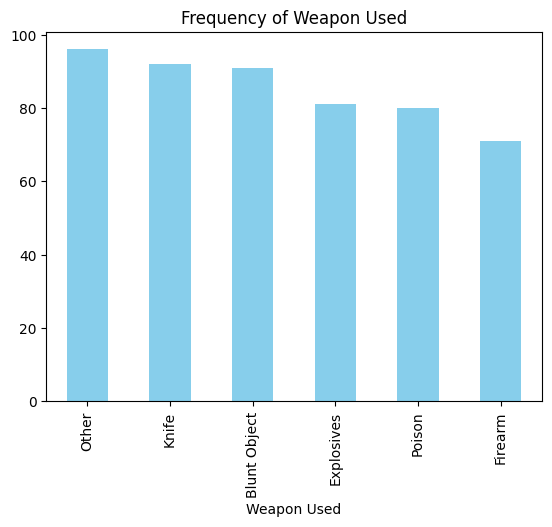

count    600.000000
mean      44.348333
std       19.824362
min       10.000000
25%       28.000000
50%       44.000000
75%       61.250000
max       79.000000
Name: Victim Age, dtype: float64


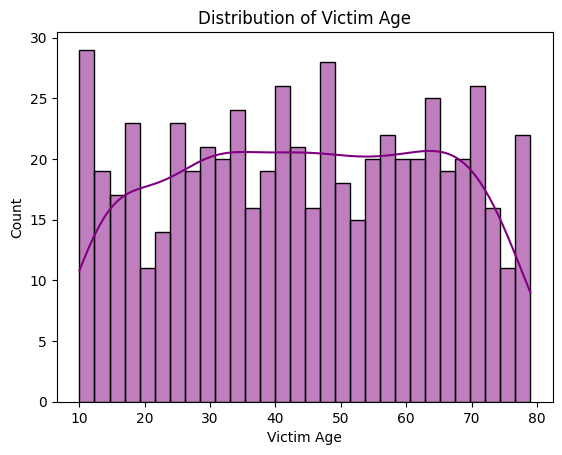

In [7]:
# Bar Chart on Frequency of Weapon Used Across the Country
categorical_col = 'Weapon Used' 
print(df[categorical_col].value_counts())
df[categorical_col].value_counts().plot(kind='bar', color='skyblue', title='Frequency of Weapon Used')
plt.show()

#Interpretation:
#This Bar Chart shows the frequency of weapons which are used to commit crimes across various parts of the country

# HistPlot showing Victim Age
numerical_col = 'Victim Age' 
print(df[numerical_col].describe())
sns.histplot(df[numerical_col], kde=True, bins=30, color='purple')
plt.title(f'Distribution of {numerical_col}')
plt.show()

#Interpretation:
#This HistPlot shows the frequency of which age group has the highest number of victims of crime

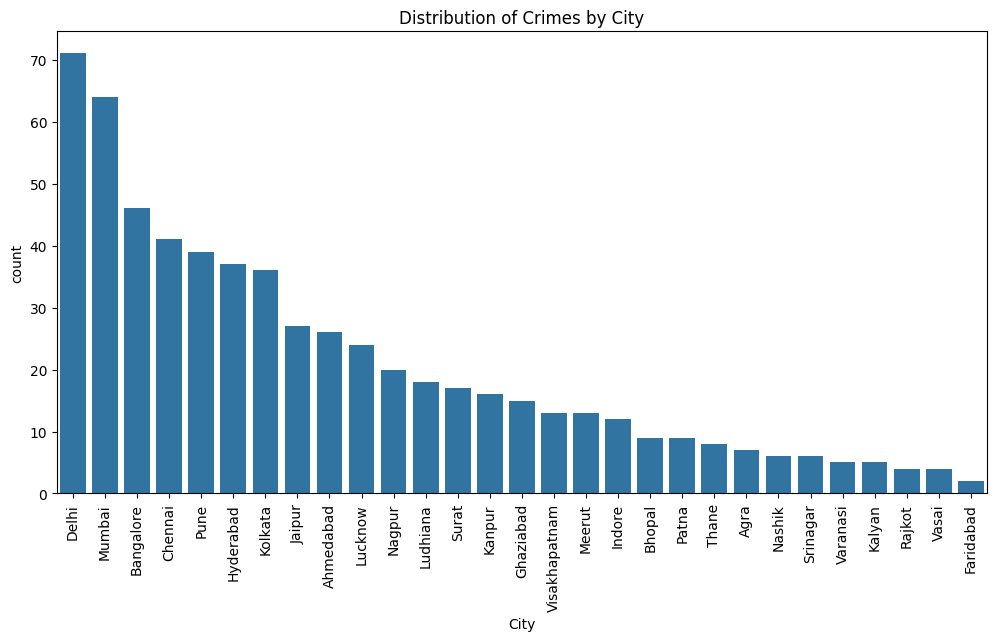

In [20]:
# Chart showing Distribution of Crimes by City
plt.figure(figsize=(12, 6))
sns.countplot(df, x='City', order=df['City'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Crimes by City')
plt.show()

#Interpretation:
#This Bar Chart is used to show which city has how much distribution of crimes.
#For Eg: Delhi has the Highest Distribution of any crime

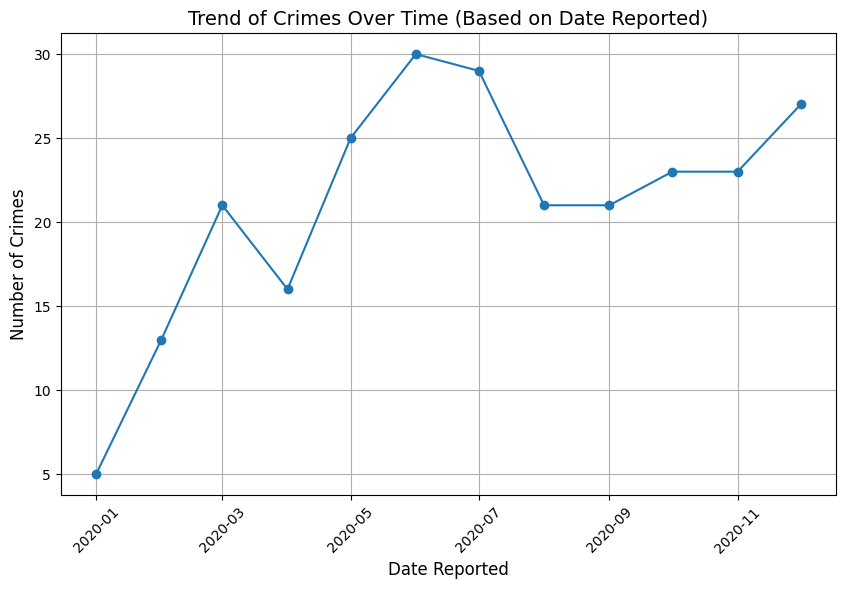

In [11]:
crime_trend = df.groupby(df['Date Reported'].dt.date).size()
plt.figure(figsize=(10, 6))
plt.plot(crime_trend.index, crime_trend.values, marker='o', linestyle='-')
plt.title("Trend of Crimes Over Time (Based on Date Reported)", fontsize=14)
plt.xlabel("Date Reported", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.show()

#Interpretation:
#This Line Chart is used to show the trends of crimes reported based on Date of Reporting of Crime 
#For Eg: In July of 2020 on average 30 Crimes were reported daily

In [19]:
df.head() #First 5 Records

,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed
0,02/01/2020 00:00,01/01/2020 00:00,01/01/2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No
1,01/01/2020 19:00,01/01/2020 01:00,01/01/2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No
2,02/01/2020 05:00,01/01/2020 02:00,01/01/2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No
3,01/01/2020 05:00,01/01/2020 03:00,01/01/2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes
4,01/01/2020 21:00,01/01/2020 04:00,01/01/2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes


In [ ]:
Bi-Variate Analysis

Crime Domain  Fire Accident  Other Crime  Traffic Fatality  Violent Crime
Weapon Used                                                              
Blunt Object              8           50                 3             30
Explosives                4           57                 1             19
Firearm                  10           31                 2             28
Knife                     9           59                 7             17
Other                    14          106                 9             56
Poison                   12           43                 4             21


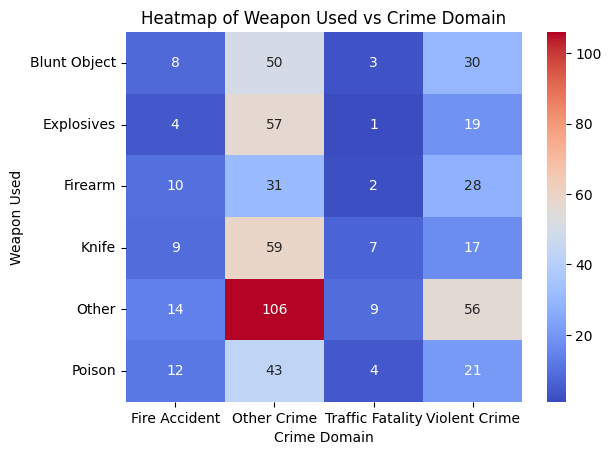

In [31]:
# Cross-tabulation and Heatmap
cat_col1, cat_col2 = 'Weapon Used', 'Crime Domain'  
crosstab = pd.crosstab(df[cat_col1], df[cat_col2])
print(crosstab)
sns.heatmap(crosstab, annot=True, cmap='coolwarm', fmt='d')
plt.title(f'Heatmap of {cat_col1} vs {cat_col2}')
plt.show()

Interpretation: The heatmap displays the relationship between Weapon Used and Crime Domain by visualizing the frequency in a cross-tabulation table. 
The represents the count of occurrences, helping to identify trends or patterns in weapon usage across different crime domains.

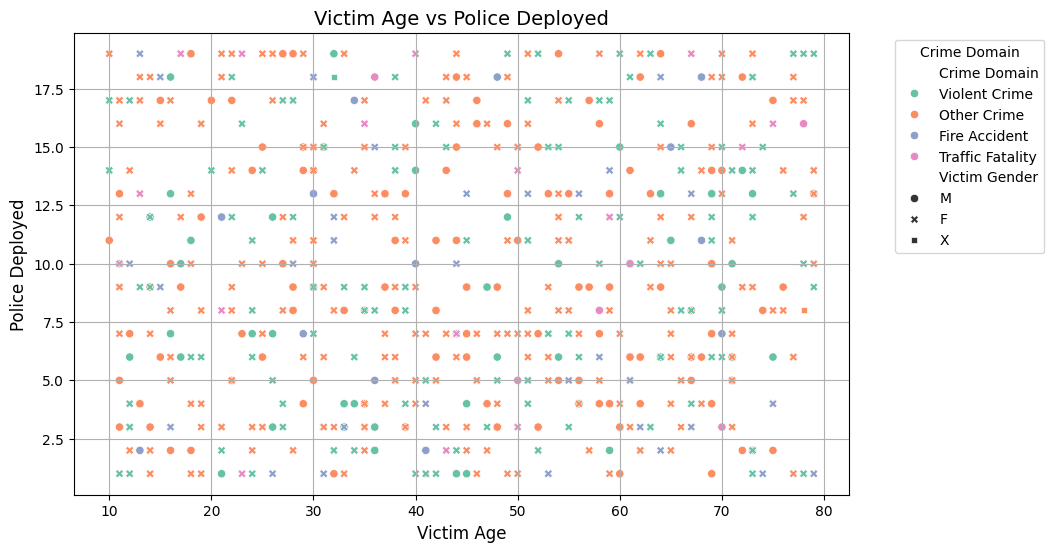

In [29]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(df,x='Victim Age',y='Police Deployed',hue='Crime Domain',style='Victim Gender',palette='Set2')
plt.title("Victim Age vs Police Deployed", fontsize=14)
plt.xlabel("Victim Age", fontsize=12)
plt.ylabel("Police Deployed", fontsize=12)
plt.legend(title="Crime Domain", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

#Interpretation:
#This scatter plot shows the relationship between Victim Age and Police Deployed, with data points categorized by Crime Domain and Victim Gender. 
#It highlights patterns in police deployment across different crime domains and victim demographics.

C:\Users\Sumit Emmanuel\AppData\Local\Temp\ipykernel_18232\2300643864.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(index='Weapon Used', columns='Age Group', aggfunc='size', fill_value=0)


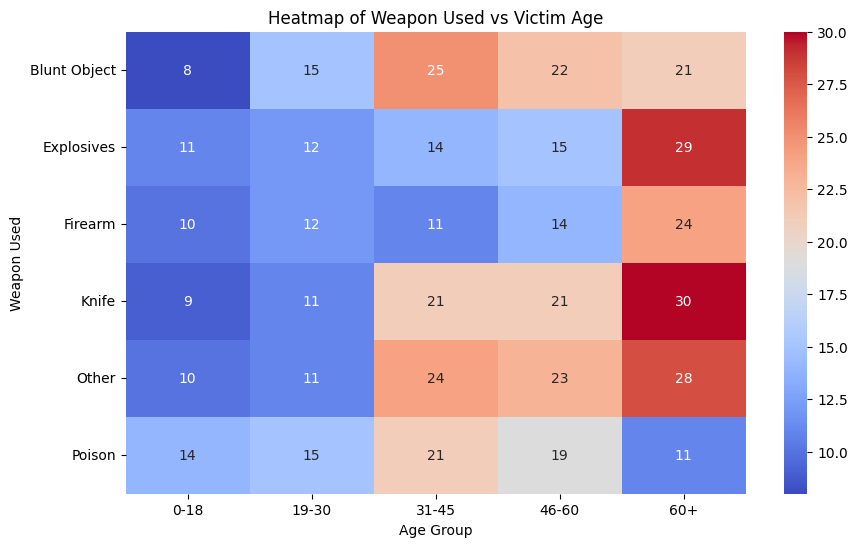

In [27]:
age_bins = [0, 18, 30, 45, 60, 100]
age_labels = ['0-18', '19-30', '31-45', '46-60', '60+']
df['Age Group'] = pd.cut(df['Victim Age'], bins=age_bins, labels=age_labels, right=False)

pivot_table = df.pivot_table(index='Weapon Used', columns='Age Group', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of Weapon Used vs Victim Age')
plt.ylabel('Weapon Used')
plt.xlabel('Age Group')
plt.show()

Interpretation: This shows Weapons Used and Victims Age, which weapon was used for which victim age group and how it affected them

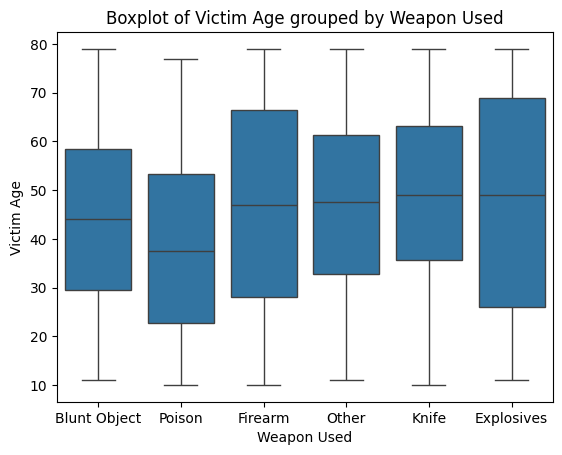

In [14]:
# Numerical vs Categorical: Boxplot
sns.boxplot(x=df['Weapon Used'], y=df['Victim Age'])
plt.title(f'Boxplot of {'Victim Age'} grouped by {'Weapon Used'}')
plt.show()

Interpretation:
We can interpret that which age group people are killed or injured with which weapon.
For eg.Firearm is used to injure or kill people between the age group of 25 to 65

In [ ]:
Multi-Variate Analysis

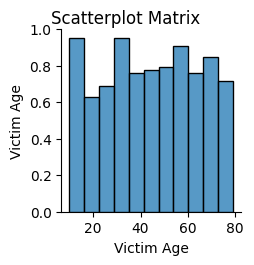

In [26]:
# Scatterplot matrix of numerical variables
numerical_cols = ['Victim Age', 'City', 'Weapon Used'] 
sns.pairplot(df[numerical_cols], diag_kind='auto')
plt.suptitle('Scatterplot Matrix', y=1.02)
plt.show()

<Figure size 1400x800 with 0 Axes>

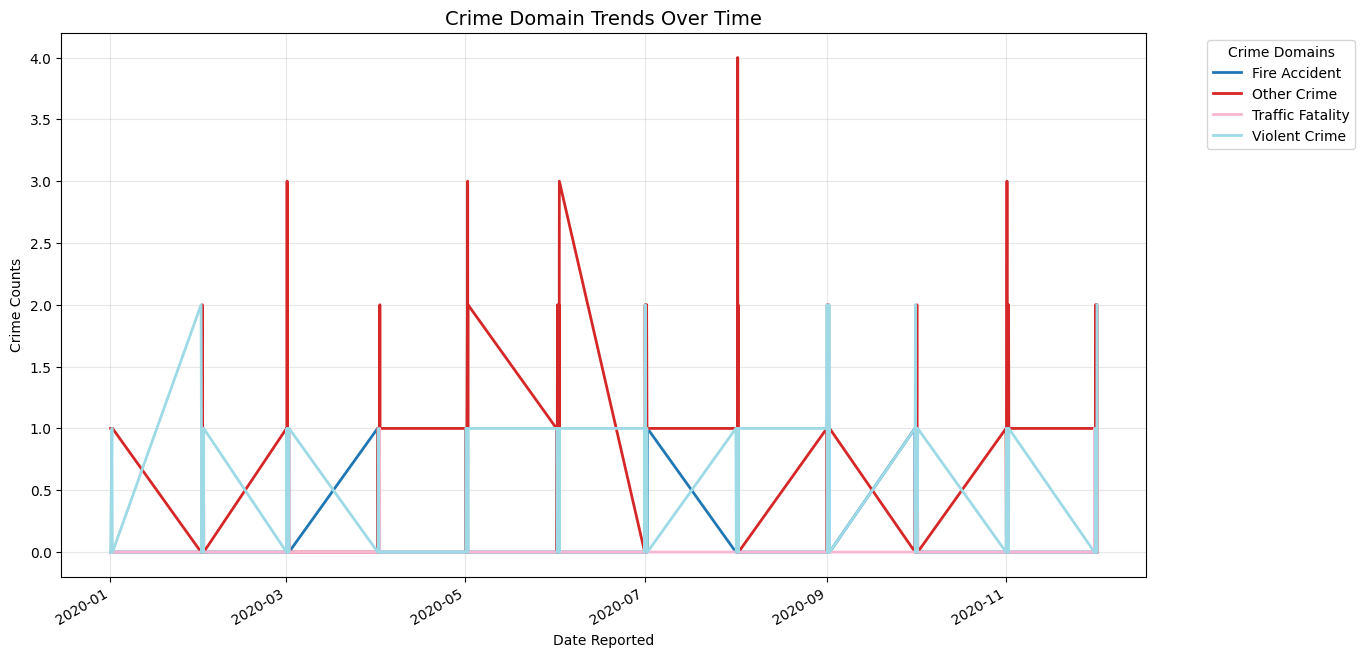

In [23]:
# Group data by Date Reported and Crime Domain
domain_trends = df.groupby(['Date Reported', 'Crime Domain']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
domain_trends.plot(kind='line', colormap='tab20', linewidth=2, figsize=(14, 8))
plt.title("Crime Domain Trends Over Time", fontsize=14)
plt.xlabel("Date Reported")
plt.ylabel("Crime Counts")
plt.legend(title="Crime Domains", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

Interpretation:
This used to analyze trends in different crime domains over time by grouping the data based on the date reported and the type of crime domain. 
It generates a line plot that visualizes the variation in crime counts for each domain across the reported dates.
Here Tarffic Fatalities are low as compared to Other Crimes over the time period present

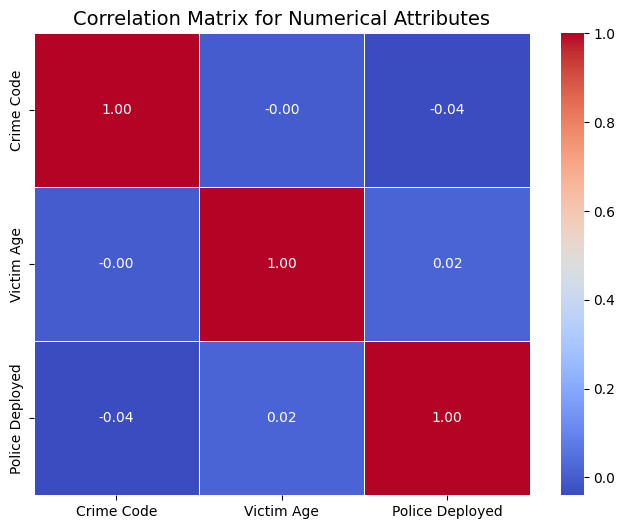

In [22]:
# Correlation Matrix of Crime Code, Victim Age and Police Deployment
numerical_cols = ['Crime Code', 'Victim Age', 'Police Deployed']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix for Numerical Attributes", fontsize=14)
plt.show()

Interpretation:
It shows the Correlation Matrix based on Crime Code, Victim Age and Police Deployed

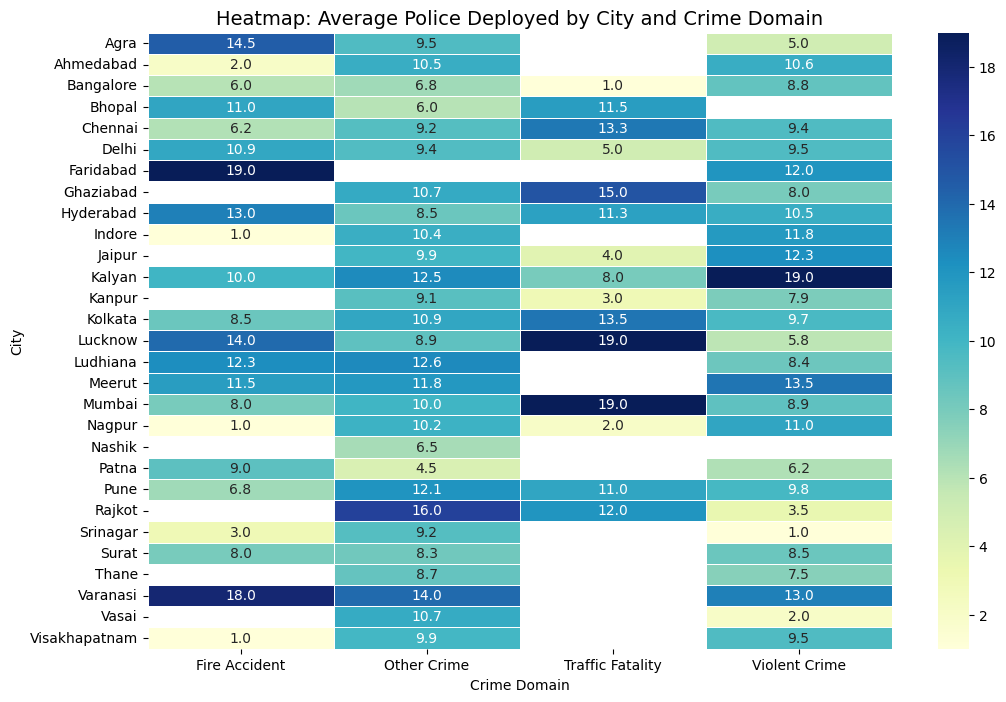

In [17]:
# Average Police Deployment by City and Crime
heatmap_data = df.pivot_table(
    index='City',
    columns='Crime Domain',
    values='Police Deployed',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.title("Heatmap: Average Police Deployed by City and Crime Domain", fontsize=14)
plt.show()

Interpretation:
Highlights how Police are Deployed across various City depending on the Crime Domain.